In [1]:
# Working with data
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore');

In [2]:
columns = ['Age', 'Work Class', 'Final Weight', 'Education', 'Education Number', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per Week', 'Country', 'Income']
dataset = pd.read_csv('adult.data', names = columns)

In [3]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
dataset['Income'] = labelEncoder.fit_transform(dataset['Income'])

In [4]:
#split the population into 3 bins, 0-25, 26-50, 51-100
dataset['Age'] = pd.cut(dataset['Age'], 
                        bins = [0, 25, 50, 100], 
                        labels = ['Young', 'Adult', 'Old'])

<AxesSubplot:xlabel='Age', ylabel='count'>

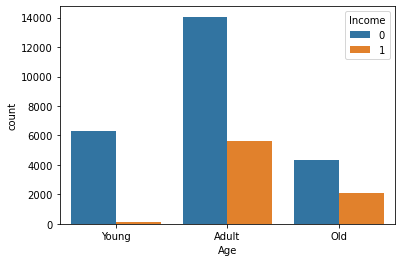

In [5]:
#tldr young people wont really have 50k
sns.countplot(x = 'Age', hue = 'Income', data = dataset)

In [6]:
#Replace capital gain and loss with difference, this makes more sense
dataset['Capital Diff'] = dataset['Capital Gain'] - dataset['Capital Loss']
dataset.drop(['Capital Gain'], axis = 1, inplace = True)
dataset.drop(['Capital Loss'], axis = 1, inplace = True)

<AxesSubplot:xlabel='Capital Diff', ylabel='count'>

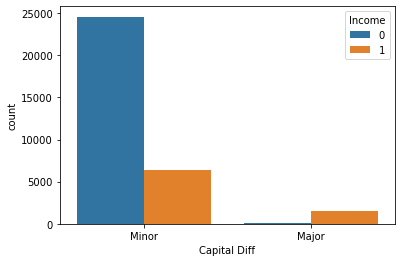

In [7]:
#For minor there are more people with income <50K and for major there are more people with income >50K
dataset['Capital Diff'] = pd.cut(dataset['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'Capital Diff', hue = 'Income', data = dataset)

In [8]:
#weight has no impact on results, dropped
dataset.drop(['Final Weight'], axis = 1, inplace = True)

In [9]:
#3 bins for hours worked per week, 0-30, 30-40 (usually majority) and 40-100 (OT)
dataset['Hours per Week'] = pd.cut(dataset['Hours per Week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Low Hours', 'Normal Hours', 'Extra Hours'])

<AxesSubplot:xlabel='Hours per Week', ylabel='count'>

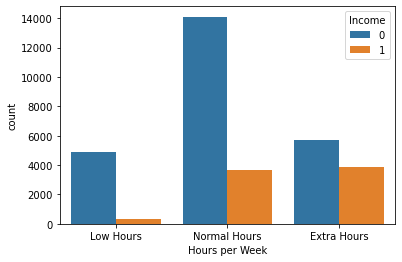

In [10]:
#more hours = more money
sns.countplot(x = 'Hours per Week', hue = 'Income', data = dataset)

<AxesSubplot:xlabel='Work Class', ylabel='count'>

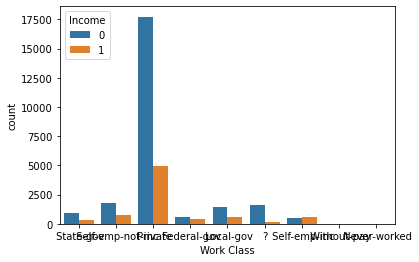

In [11]:
#See if the type of work has anything to do with income
sns.countplot(x = 'Work Class', hue = 'Income', data = dataset)

In [12]:
#there seems to be data that is irrelevant: never worked, ? and without pay
dataset = dataset.drop(dataset[dataset['Work Class'] == ' ?'].index)
dataset = dataset.drop(dataset[dataset['Work Class'] == ' Without-pay'].index)
dataset = dataset.drop(dataset[dataset['Work Class'] == ' Never-worked'].index)

<AxesSubplot:xlabel='Education', ylabel='count'>

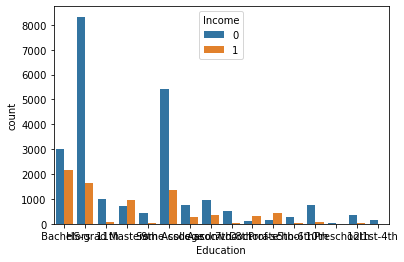

In [13]:
#See if education has anything to do with income
sns.countplot(x = 'Education', hue = 'Income', data = dataset)

In [14]:
#lets see what the difference between education number and education are
education_classes = dataset['Education'].unique()
for edu_class in education_classes:
    print("For {}, the Education Number is {}"
          .format(edu_class, dataset[dataset['Education'] == edu_class]['Education Number'].unique()))

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  Assoc-voc, the Education Number is [11]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]
For  1st-4th, the Education Number is [2]


In [15]:
#theyre the same. we drop number as its not very intuitive
#also combine all the preschool to 12th grade, since theyre pre-college so they kinda belong tgt

dataset.drop(['Education Number'], axis = 1, inplace = True)
dataset['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
dataset['Education'].value_counts()

 HS-grad         9959
 Some-college    6772
 Bachelors       5182
 School          3820
 Masters         1675
 Assoc-voc       1321
 Assoc-acdm      1019
 Prof-school      558
 Doctorate        398
Name: Education, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

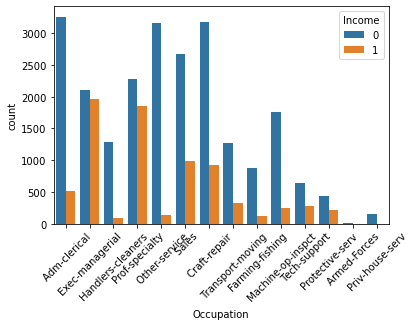

In [16]:
#plot the occupation to income ratio
plt.xticks(rotation = 45)
sns.countplot(x = 'Occupation', hue = 'Income', data = dataset)

<AxesSubplot:xlabel='Race', ylabel='count'>

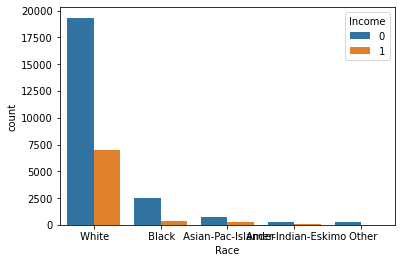

In [17]:
#lets see the race distribution
sns.countplot(x = 'Race', hue = 'Income', data = dataset)

In [18]:
#lets just combine all non-whites
dataset['Race'].unique()
dataset['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

<AxesSubplot:xlabel='Sex', ylabel='count'>

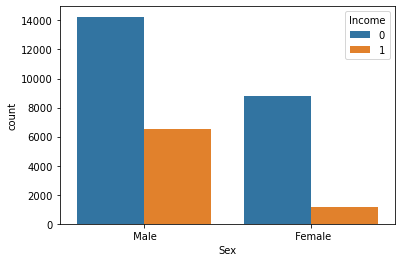

In [19]:
#see if sex has any impact on income
sns.countplot(x = 'Sex', hue = 'Income', data = dataset)

Text(0.5, 1.0, 'Total adults from each Country')

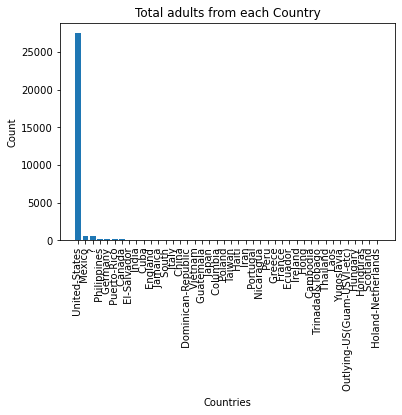

In [20]:
#what about country distrib?
country_count = dataset['Country'].value_counts()
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

In [21]:
#there is a ? country, we'll drop that
dataset = dataset.drop(dataset[dataset['Country'] == ' ?'].index)
#majority are also american. we should combine everyone non-american
#copy the data
countries = np.array(dataset['Country'].unique())
#delete the americans
countries = np.delete(countries, 0)
dataset['Country'].replace(countries, 'Other', inplace = True)

<AxesSubplot:xlabel='count', ylabel='Country'>

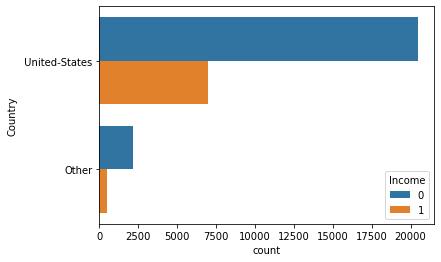

In [22]:
#now we have better view of data
sns.countplot(y = 'Country', hue = 'Income', data = dataset)

In [23]:
#todo: train-test split
#todo: machine learning stuffs